In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import plot_confusion_matrix

In [5]:
df = pd.read_excel('heart.xlsx')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.rename(columns = {'Age':'Yas', 'Sex':'Cinsiyet','ChestPainType':'Gögüs_Ağrısı_Tipi','RestingBP':'Dinlenme_Kan_Basıncı',
                     'Cholesterol':'Kolesterol',
                     'FastingBS':'Açlık_Kan_Şekeri','RestingECG':'Dinlenme_EKG','MaxHR':'Max_Nabız',
                     'ExerciseAngina':'Egzersiz_Anjin','Oldpeak':'Depresyon_Degeri','ST_Slope':'Tepe_Egzersiz_Egimi',
                     'HeartDisease':'Kalp_Hastalıgı'}, inplace = True)

# Görselleştirme

# değişkenler üzerine açıklayıcı grafikler

In [ ]:
df.info()

In [ ]:
#bağımlı değişken sınıf dağılımı

sns.catplot(x="Kalp_Hastalıgı",kind="count",data=df)

In [ ]:
#cinsiyet
sns.catplot(x="Cinsiyet",kind="count",data=df)

In [ ]:
#Gögüs_Ağrısı_Tipi
sns.catplot(x="Gögüs_Ağrısı_Tipi",kind="count",data=df)

In [ ]:
#Gögüs_Ağrısı_Tipi
sns.catplot(x="Dinlenme_EKG",kind="count",data=df)

In [ ]:
#Egzersiz_Anjin
sns.catplot(x="Egzersiz_Anjin",kind="count",data=df)

In [ ]:
#Tepe_Egzersiz_Egimi
sns.catplot(x="Tepe_Egzersiz_Egimi",kind="count",data=df)

In [ ]:
# yaş dağılımı
plt.figure(figsize=(8,7))
sns.distplot(df.Yas, color="blue")

In [ ]:
#max_nabız
plt.figure(figsize=(8,5))
sns.kdeplot(df.Max_Nabız,shade=True, color="blue")

In [ ]:
#depresyon değeri
#plt.figure(figsize=(8,5))
sns.kdeplot(df.Depresyon_Degeri,shade=True, color="blue")

# Bağımlı değişken ile diğer değişkenlerin kesişimi

In [ ]:
df.info()

In [ ]:
sns.catplot(x="Cinsiyet", kind="count",hue="Kalp_Hastalıgı",data=df)

In [ ]:
sns.catplot(x="Gögüs_Ağrısı_Tipi", kind="count",hue="Kalp_Hastalıgı",data=df)

In [ ]:
sns.catplot(x="Dinlenme_EKG", kind="count",hue="Kalp_Hastalıgı",data=df)

In [ ]:
sns.catplot(x="Egzersiz_Anjin", kind="count",hue="Kalp_Hastalıgı",data=df)

In [ ]:
sns.catplot(x="Tepe_Egzersiz_Egimi", kind="count",hue="Kalp_Hastalıgı",data=df)

In [ ]:

df.groupby("Kalp_Hastalıgı",as_index=False).mean()

# Veri ön işleme

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Yas                   918 non-null    int64  
 1   Cinsiyet              918 non-null    object 
 2   Gögüs_Ağrısı_Tipi     918 non-null    object 
 3   Dinlenme_Kan_Basıncı  918 non-null    int64  
 4   Kolesterol            918 non-null    int64  
 5   Açlık_Kan_Şekeri      918 non-null    int64  
 6   Dinlenme_EKG          918 non-null    object 
 7   Max_Nabız             918 non-null    int64  
 8   Egzersiz_Anjin        918 non-null    object 
 9   Depresyon_Degeri      918 non-null    float64
 10  Tepe_Egzersiz_Egimi   918 non-null    object 
 11  Kalp_Hastalıgı        918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
#veri üzerine daha detaylı bir bakış (numerik değerlerin istatistiksel özeti)
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Yas,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
Dinlenme_Kan_Basıncı,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Kolesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
Açlık_Kan_Şekeri,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
Max_Nabız,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Depresyon_Degeri,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
Kalp_Hastalıgı,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [9]:
#kategorik değişkenlere erişme
cat_cols=df.select_dtypes(include=["object"])

In [10]:
cat_cols.head()

,Cinsiyet,Gögüs_Ağrısı_Tipi,Dinlenme_EKG,Egzersiz_Anjin,Tepe_Egzersiz_Egimi
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


#### Karakter olan object ifadelerin modele konulması mümkün değildir.kategorik değerlerin sayısallaştırılması gerekmektedir. Bu nedenle one hot encoder ile kategorik değişkenler dummy değişkenler haline getirilerek sayıllaştırılmıştır. 

In [11]:
df1=pd.get_dummies(df, columns = ["Gögüs_Ağrısı_Tipi"], prefix = ["Gögüs_Ağrısı_Tipi"])
df1=pd.get_dummies(df1, columns = ["Dinlenme_EKG"], prefix = ["Dinlenme_EKG"])
df1=pd.get_dummies(df1, columns = ["Tepe_Egzersiz_Egimi"], prefix = ["Tepe_Egzersiz_Egimi"])


In [12]:
df1=pd.get_dummies(df1, columns = ["Cinsiyet"], prefix = ["Cinsiyet"],  drop_first=True )
df1=pd.get_dummies(df1, columns = ["Egzersiz_Anjin"], prefix = ["Egzersiz_Anjin"],  drop_first=True )

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Yas                       918 non-null    int64  
 1   Dinlenme_Kan_Basıncı      918 non-null    int64  
 2   Kolesterol                918 non-null    int64  
 3   Açlık_Kan_Şekeri          918 non-null    int64  
 4   Max_Nabız                 918 non-null    int64  
 5   Depresyon_Degeri          918 non-null    float64
 6   Kalp_Hastalıgı            918 non-null    int64  
 7   Gögüs_Ağrısı_Tipi_ASY     918 non-null    uint8  
 8   Gögüs_Ağrısı_Tipi_ATA     918 non-null    uint8  
 9   Gögüs_Ağrısı_Tipi_NAP     918 non-null    uint8  
 10  Gögüs_Ağrısı_Tipi_TA      918 non-null    uint8  
 11  Dinlenme_EKG_LVH          918 non-null    uint8  
 12  Dinlenme_EKG_Normal       918 non-null    uint8  
 13  Dinlenme_EKG_ST           918 non-null    uint8  
 14  Tepe_Egzer

# MODELLER

In [14]:
#train  - test diye veri setinin ayrılması.
# vei setinin %80'i train, %20'si test olarak ayrılmıştır.

from sklearn.model_selection import train_test_split 

X = df1.drop('Kalp_Hastalıgı', axis=1)
y = df1['Kalp_Hastalıgı']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [17]:
y_pred = nb_model.predict(X_train)
accuracy_score(y_train, y_pred) #train skoru

0.8637602179836512

In [18]:
#test skoru
y_pred1 = nb_model.predict(X_test)
accuracy_score(y_test, y_pred1)

0.8315217391304348

In [19]:
confusion_matrix(y_test, y_pred1)

array([[57, 20],
       [11, 96]], dtype=int64)

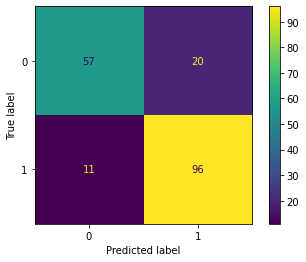

In [20]:
plot_confusion_matrix(nb_model, X_test, y_test)  
plt.show()

In [21]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79        77
           1       0.83      0.90      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



# KNN 

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [23]:
#train seti başarı oranı
y_pred2 = knn_model.predict(X_train)  
accuracy_score(y_train, y_pred2)

0.7874659400544959

In [24]:
#model test başarı oranı
y_pred_knn = knn_model.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.6902173913043478

In [25]:
confusion_matrix(y_test, y_pred_knn)

array([[48, 29],
       [28, 79]], dtype=int64)

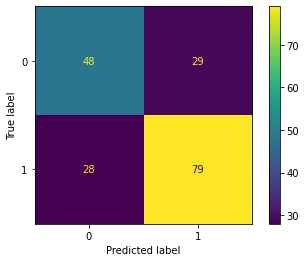

In [26]:
plot_confusion_matrix(knn_model, X_test, y_test)  
plt.show()

In [27]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.63      0.62      0.63        77
           1       0.73      0.74      0.73       107

    accuracy                           0.69       184
   macro avg       0.68      0.68      0.68       184
weighted avg       0.69      0.69      0.69       184



# K - Means

### bu algoritma değişkenleri kendi arasında kümelemeye yaramaktadır. Numerik değerleri çalıştırmak gereklidir.

In [37]:
df_kum=df.select_dtypes(include=["int64","float64"])
df_kum.drop("Kalp_Hastalıgı",axis=1, inplace=True)

In [38]:
df_kum.head()

,Yas,Dinlenme_Kan_Basıncı,Kolesterol,Açlık_Kan_Şekeri,Max_Nabız,Depresyon_Degeri
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0


### optimum küme sayısını belirlemek için yellowbrick kütüphanesi kullanılabilir. Aşağıda görüldüğü üzere optimum küme sayııs 5 olarak belirlenmiştir.

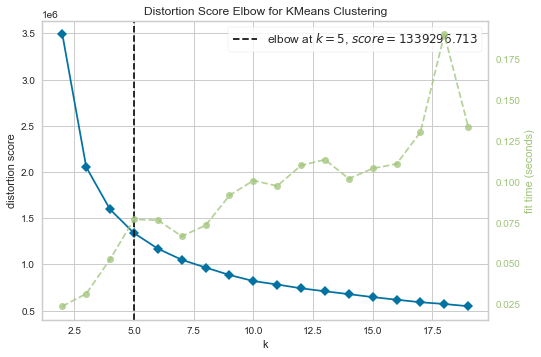

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,20))
visualizer.fit(df_kum) 
visualizer.poof()  

In [49]:
#küme sayısı 5 olacak şekilde kümeleme modeli kurulursa

kmeans = KMeans(n_clusters = 5)
k_fit = kmeans.fit(df_kum)
kumeler = k_fit.labels_

In [51]:
#pd.DataFrame({"Mağaza Kodu" : df.index, "Kumeler": kumeler})[0:10]
df["kume_no"] = kumeler
df.head()

,Yas,Cinsiyet,Gögüs_Ağrısı_Tipi,Dinlenme_Kan_Basıncı,Kolesterol,Açlık_Kan_Şekeri,Dinlenme_EKG,Max_Nabız,Egzersiz_Anjin,Depresyon_Degeri,Tepe_Egzersiz_Egimi,Kalp_Hastalıgı,kume_no
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,2
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,4
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,2


In [56]:
df.groupby("kume_no",as_index=False).mean()

,kume_no,Yas,Dinlenme_Kan_Basıncı,Kolesterol,Açlık_Kan_Şekeri,Max_Nabız,Depresyon_Degeri,Kalp_Hastalıgı
0,0,53.898551,137.173913,298.628019,0.173913,139.429952,1.011594,0.550725
1,1,56.236994,129.624277,0.491329,0.514451,122.092486,0.820809,0.878613
2,2,51.396985,131.748744,182.663317,0.145729,141.703518,0.782915,0.407035
3,3,53.850000,139.600000,443.800000,0.300000,135.850000,0.990000,0.600000
4,4,53.078370,130.752351,236.272727,0.169279,140.097179,0.901567,0.467085


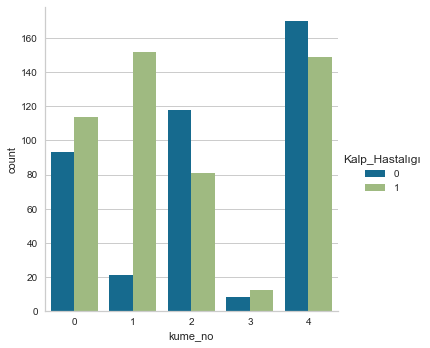

In [57]:
sns.catplot(x="kume_no", kind="count",hue="Kalp_Hastalıgı",data=df)